In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def load_data(path = "datasets/eil51.txt"):
    with open(path, 'r') as f:
        inputData = f.readlines()
    
    N = int(inputData[0].strip())
    node_list=[]
    for node in inputData[1:]:
        #del '\n' 
        node = node.strip()
        #split by ' '
        node = node.split(' ')
        node_list.append((int(node[1]), int(node[2])))

    return node_list, N

In [93]:
node_list, num_cities = load_data()
print(node_list)
print(num_cities)

[(37, 52), (49, 49), (52, 64), (20, 26), (40, 30), (21, 47), (17, 63), (31, 62), (52, 33), (51, 21), (42, 41), (31, 32), (5, 25), (12, 42), (36, 16), (52, 41), (27, 23), (17, 33), (13, 13), (57, 58), (62, 42), (42, 57), (16, 57), (8, 52), (7, 38), (27, 68), (30, 48), (43, 67), (58, 48), (58, 27), (37, 69), (38, 46), (46, 10), (61, 33), (62, 63), (63, 69), (32, 22), (45, 35), (59, 15), (5, 6), (10, 17), (21, 10), (5, 64), (30, 15), (39, 10), (32, 39), (25, 32), (25, 55), (48, 28), (56, 37), (30, 40)]
51


In [94]:
def DistanceMatrix(cities, n):
    dis_matrix = np.zeros([n,n])
    min_dis = np.full((n, 2), np.inf)
    adv0 = []
    for i in range(n):
        for j in range(i+1, n):
            a = np.array(cities[i])
            b = np.array(cities[j])
            c = a - b
            dis_matrix[i, j] = np.sqrt(np.sum(c*c))
            if dis_matrix[i, j] < min_dis[i, 1]:
              min_dis[i, 0] = j
              min_dis[i, 1] = dis_matrix[i, j]
            dis_matrix[j, i] = dis_matrix[i, j]
            if dis_matrix[j, i] < min_dis[j, 1] and i != 0:
              min_dis[j, 0] = i
              min_dis[j, 1] = dis_matrix[i, j]
            if i == 0: adv0.append((dis_matrix[i, j], j))
    
    adv0.sort(key=lambda tup: tup[0], reverse = False)

    return dis_matrix, min_dis, adv0

In [95]:
dis_matrix, min_dis, adv0 = DistanceMatrix(node_list, num_cities)

#set print full and one line
#np.set_printoptions(threshold=np.inf, linewidth=np.inf)
dis_matrix
print(adv0)

[(6.082762530298219, 31), (7.0710678118654755, 21), (8.06225774829855, 26), (11.661903789690601, 7), (12.083045973594572, 10), (12.36931687685298, 1), (12.36931687685298, 47), (13.892443989449804, 50), (13.92838827718412, 45), (16.15549442140351, 27), (16.76305461424021, 5), (17.0, 30), (18.601075237738275, 15), (18.788294228055936, 37), (18.867962264113206, 25), (19.209372712298546, 2), (20.8806130178211, 11), (20.8806130178211, 19), (21.37755832643195, 28), (21.587033144922902, 22), (22.20360331117452, 4), (22.825424421026653, 6), (23.323807579381203, 46), (24.20743687382041, 8), (24.20743687382041, 49), (26.40075756488817, 48), (26.92582403567252, 13), (26.92582403567252, 20), (27.313000567495326, 34), (27.586228448267445, 17), (29.0, 23), (30.4138126514911, 36), (30.610455730027933, 33), (30.675723300355934, 16), (31.064449134018133, 3), (31.064449134018133, 35), (32.64965543462902, 29), (33.1058907144937, 24), (34.0147027033899, 9), (34.17601498127012, 42), (36.013886210738214, 14

In [96]:
import math

size_pop = 500
Pc = 0.8
Pm = 0.1
dims = num_cities - 1 #start from 0
#set of individuals generated
mark = set()
best_parents = (0, math.inf)

In [97]:
def Fitness(indiv):
    cost = dis_matrix[0, indiv[0]]
    for i in range(dims - 1):
        cost += dis_matrix[indiv[i], indiv[i+1]]
    cost += dis_matrix[indiv[dims-1], 0]

    return cost

In [98]:
def GeneratorPopulaion(sizePop, dims):
    Populaion = []
    for i in range(sizePop):
        pi = np.random.permutation(range(1, dims))
        f_pi = Fitness(pi)
        global best_parents
        if f_pi < best_parents[1]: 
            best_parents = (pi, f_pi)
        mark.add(hash(pi.tobytes()))
        Populaion.append((pi, f_pi))

    return Populaion

In [99]:
def GreedyGeneration(sizePop, dims):
  Populaion = []
  n = dims-1
  i = 0

  while i < sizePop:
    st = adv0[i][1]
    indiv = [st]
    while len(indiv) < n:
      if(np.random.random_sample() < 0.2): 
        temp = np.random.randint(1, dims)
        if temp not in indiv:
          indiv.append(temp)
      elif int(min_dis[indiv[-1], 0]) not in indiv:
        indiv.append(int(min_dis[indiv[-1], 0]))
    
    indiv = np.array(indiv)
    f_indiv = Fitness(indiv)

    global best_parents
    if f_indiv < best_parents[1]: 
      best_parents = (indiv, f_indiv)
    mark.add(hash(indiv.tobytes()))

    Populaion.append((indiv, f_indiv))

    i += 1

  return Populaion

In [100]:
import random

def Generation(sizePop, dims):
  greedy_size = int(sizePop*0.4)
  pop = GreedyGeneration(greedy_size, dims) + GeneratorPopulaion(sizePop-greedy_size, dims)
  random.shuffle(pop)
  return pop

In [101]:
def chooseParents(pop):
    n = len(pop)
    index1 = np.random.randint(n)
    while True:
        index2 = np.random.randint(n)
        if index1 == index2: break
    index3 = np.random.randint(n)
    while True:
        index4 = np.random.randint(n)
        if index3 == index4: break
    
    if pop[index1][1] < pop[index2][1]:
        p1 = pop[index1][0]
    else:
        p1 = pop[index2][0]
    
    if pop[index3][1] < pop[index4][1]:
        p2 = pop[index3][0]
    else:
        p2 = pop[index4][0]
    
    return p1, p2

In [102]:
def cross_pmx(p1, p2):
    n = len(p1)
    # min = int(n/4)
    # max = int(n - n/4)

    if n > 13:
        cross = 10
    else:
        cross = 0
    #if(np.random.random_sample() < 0.01): cross = 25
    
    index1 = np.random.randint(1, n-cross)
    index2 = index1 + cross
    #while index1 == index2:
    #    index2 = np.random.randint(1, n-1)
   
    # if index1 > index2:
    #     temp = index1
    #     index1 = index2
    #     index2 = temp

    #print(index1, index2)

    o1 = np.array(p2)
    o2 = np.array(p1)

    pos1 = np.full(n+1, -1, dtype=int)
    pos2 = np.full(n+1, -1, dtype=int)
    for i in range(index1, index2+1):
        pos1[o1[i]] = i
        pos2[o2[i]] = i
        
    for i in range(n):
        if index1 <= i and i <= index2: continue

        id1 = i
        while True:
            if pos1[p1[id1]] == -1:
                o1[i] = p1[id1]
                break
            id1 = pos1[p1[id1]]
        
        id2 = i
        while True:
            if pos2[p2[id2]] == -1:
                o2[i] = p2[id2]
                break
            id2 = pos2[p2[id2]]
    
    return o1, o2

In [103]:
def mutation_swap(individual):
    n = len(individual)
    res = np.array(individual)

    index1 = np.random.randint(n)
    index2 = np.random.randint(n)
    while index1 == index2:
        index2 = np.random.randint(n)

    temp = res[index1]
    res[index1] = res[index2]
    res[index2] = temp

    return res

In [104]:
def check_generated(individual):
    hash_val = hash(individual.tobytes())
    pre_size = len(mark)
    mark.add(hash_val)
    if(pre_size < len(mark)): return False
    
    return True

In [105]:
import random

def selection(pre_pop, offs_pop, rate_sel = 0.2):  
    n = len(pre_pop)
    n_p = int(n*rate_sel)
    n_o = int(n*(0.5 - rate_sel))
    pre_pop.sort(key=lambda tup: tup[1], reverse = False)
    offs_pop.sort(key=lambda tup: tup[1], reverse = False)
    pop = pre_pop[n_p:] + offs_pop[n_o:]
    pop.sort(key=lambda tup: tup[1], reverse = False)
    next_pop = pre_pop[0:n_p] + offs_pop[0:n_o] + pop[0:(n-n_p-n_o)]
    random.shuffle(next_pop)
    return next_pop

In [106]:
from copy import deepcopy
#start_population = GeneratorPopulaion(size_pop, num_cities)
def GA(size_pop, num_gens, Pc, Pm):
    #population = GeneratorPopulaion(size_pop, num_cities)
    population = Generation(size_pop, num_cities)
    res = deepcopy(best_parents)
    best_offs = (0, math.inf)
    logg = []

    t = 0
    while t < num_gens:
        offs_pop = []
        while len(offs_pop) < size_pop:
            p1, p2 = chooseParents(population)

            rand = np.random.random_sample()
            o1, o2 = [], []
            if rand <= Pc:
                o1, o2 = cross_pmx(p1, p2)
                if check_generated(o1): o1 = mutation_swap(o1)
                if check_generated(o2): o2 = mutation_swap(o2)
            else:
                o1 = mutation_swap(p1)
                o2 = mutation_swap(p2)
            if np.random.random_sample() < Pm:
                o1 = mutation_swap(o1)
                o2 = mutation_swap(o2)
            if not check_generated(o1):
            #if True:
                f_o1 = Fitness(o1)
                if(f_o1 < best_offs[1]): best_offs = (o1, f_o1)
                offs_pop.append((o1, f_o1))
            if not check_generated(o2):
            #if True:
                f_o2 = Fitness(o2)
                if(f_o2 < best_offs[1]): best_offs = (o2, f_o2)
                offs_pop.append((o2, f_o2))
        
        population = selection(population, offs_pop)
        if res[1] > best_offs[1]: res = best_offs
        logg.append([t, res])
        t+= 1
    
    return logg

In [107]:
def show(his):
    input = np.array(his, dtype=object)
    x = input[:, 0]
    y = np.array(input[:, 1])
    y = [i[1] for i in y]
    plt.plot(x, y)
    plt.title('GA')
    plt.show()

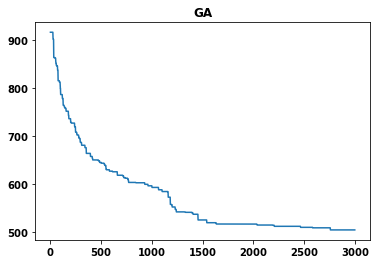

(array([21,  1, 15, 49,  8, 29,  9, 48, 37,  4, 11, 46,  3, 12, 40, 39, 18,
       41, 43, 36, 16, 17, 24, 13,  5, 14, 44, 32, 38, 33, 20, 28, 19, 34,
       35,  2, 31, 10, 45, 50, 26, 47, 22, 23, 42,  6, 25,  7, 30, 27]), 504.1541138537594)


In [124]:
history = GA(15, 3000, 0.75, 0.01)
show(history)
print(history[-1][1])